$$\small \color{green}{\textbf{The Threshold ARCH (TARCH) Modelling}}$$ 


$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$


This computer program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$\text{2. Dataset:}$ 

One can download the dataset used to replicate my project at my Repositories on the Github site below

https://github.com/phuongvnguyen/TARCH-Modelling/blob/master/data.xlsx

# Preparing Problem

##  Loading Libraries

In [1]:
import warnings
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from arch import arch_model
from arch.univariate import GARCH

## Defining some varibales for printing the result

In [2]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

##  Loading Dataset

In [3]:
data = pd.read_excel("data.xlsx")


# Data Exploration and Preration

## Data exploration

In [4]:
data.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2007-09-19,125.0,VIC,125.0,125.0,125.0,307840
1,2007-09-20,131.0,VIC,131.0,131.0,130.0,794790
2,2007-09-21,137.0,VIC,137.0,137.0,135.0,1224660
3,2007-09-24,143.0,VIC,143.0,143.0,143.0,551130
4,2007-09-25,150.0,VIC,150.0,150.0,148.0,962110


## Computing returns
### Picking up the close prices

In [5]:
closePrice = data[['DATE','CLOSE']]
closePrice.head(5)

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


### Computing the daily returns

In [6]:
closePrice['Return'] = closePrice['CLOSE'].pct_change()
closePrice.head()

,DATE,CLOSE,Return
0,2007-09-19,125.0,NaN
1,2007-09-20,131.0,0.048000
2,2007-09-21,137.0,0.045802
3,2007-09-24,143.0,0.043796
4,2007-09-25,150.0,0.048951


In [7]:
daily_return=closePrice[['DATE','Return']]
daily_return.head()

,DATE,Return
0,2007-09-19,NaN
1,2007-09-20,0.048000
2,2007-09-21,0.045802
3,2007-09-24,0.043796
4,2007-09-25,0.048951


### Reseting index

In [8]:
daily_return =daily_return.set_index('DATE')
daily_return.head()

,Return
DATE,
2007-09-19,NaN
2007-09-20,0.048000
2007-09-21,0.045802
2007-09-24,0.043796
2007-09-25,0.048951


In [9]:
daily_return = 100 * daily_return.dropna()
daily_return.head()

,Return
DATE,
2007-09-20,4.800000
2007-09-21,4.580153
2007-09-24,4.379562
2007-09-25,4.895105
2007-09-26,4.666667


In [10]:
daily_return.index

DatetimeIndex(['2007-09-20', '2007-09-21', '2007-09-24', '2007-09-25',
               '2007-09-26', '2007-09-27', '2007-09-28', '2007-10-01',
               '2007-10-02', '2007-10-03',
               ...
               '2014-12-18', '2014-12-19', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1816, freq=None)

### Plotting returns

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

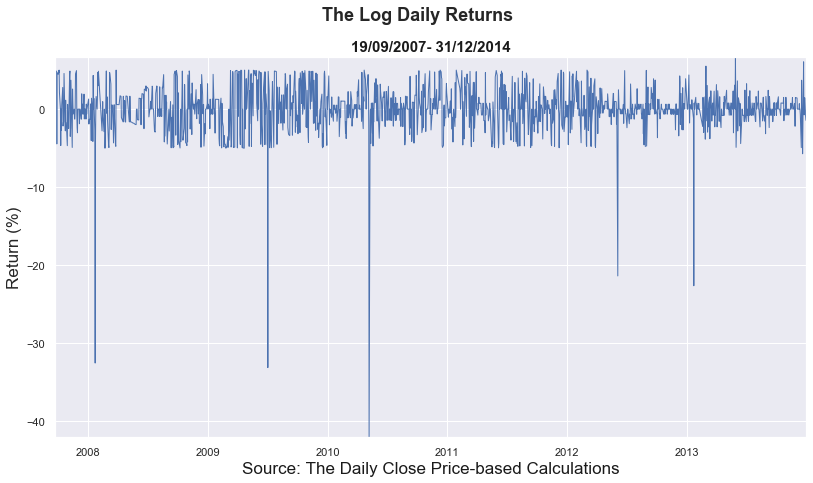

In [12]:
sns.set()
fig=plt.figure(figsize=(12,7))
plt.plot(daily_return.Return['2007':'2013'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Log Daily Returns', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 31/12/2014',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Return (%)',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

# Modelling TARCH model

$$\text{Mean equation:}$$
$$r_{t}=\mu + \epsilon_{t}$$

$$\text{Conditional Volatility (Variance) equation:}$$
$$\sigma^{k}_{t}= \omega + \alpha |\epsilon_{t}|^{k} + \gamma |\epsilon_{t-1}|^{k} \mathbf{I}_{[\epsilon_{t-1}<0]}+\beta\sigma^{k}_{t-1}$$

$$\text{where:}$$


$$\epsilon_{t}= \sigma_{t} e_{t}$$

$$e_{t} \sim N(0,1)$$

$$\mathbf{I} $$ $$\text{is an indicator function that takes the value 1 when its argument is true}$$


In [26]:
tarch= arch_model(daily_return, p=1, o=1, q=1, power=1.0)
results = tarch.fit(update_freq=1, disp='on')
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4429.060422011709
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4416.907990300825
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4414.309769125937
Iteration:      4,   Func. Count:     35,   Neg. LLF: 4405.847524777993
Iteration:      5,   Func. Count:     43,   Neg. LLF: 4395.121722254737
Iteration:      6,   Func. Count:     51,   Neg. LLF: 4391.755245635992
Iteration:      7,   Func. Count:     59,   Neg. LLF: 4383.577909995406
Iteration:      8,   Func. Count:     67,   Neg. LLF: 4382.5516709779
Iteration:      9,   Func. Count:     75,   Neg. LLF: 4382.416914650486
Iteration:     10,   Func. Count:     83,   Neg. LLF: 4382.412235338599
Iteration:     11,   Func. Count:     90,   Neg. LLF: 4382.41049011756
Iteration:     12,   Func. Count:     97,   Neg. LLF: 4382.410294343254
Iteration:     13,   Func. Count:    104,   Neg. LLF: 4382.410291392032
                  Constant Mean - TARCH/ZARCH Model Results        

# Checking the residual
## Checking residuals

Text(0, 0.5, 'Residuals')

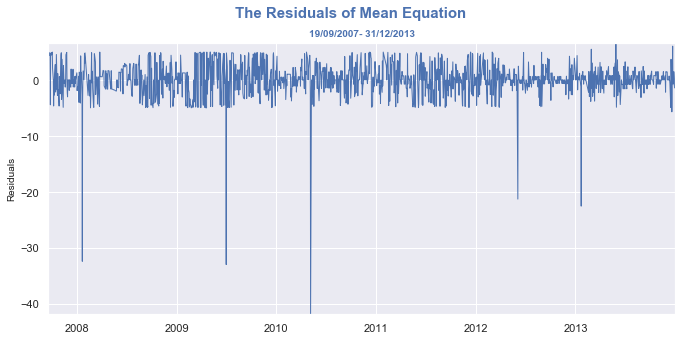

In [23]:
fig=plt.figure(figsize=(10,5))
plt.plot(results.resid['2007':'2013'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Residuals of Mean Equation', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2013',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Residuals',fontsize=10,color='k')

## Conditional volatility

Text(0, 0.5, 'Volatilies')

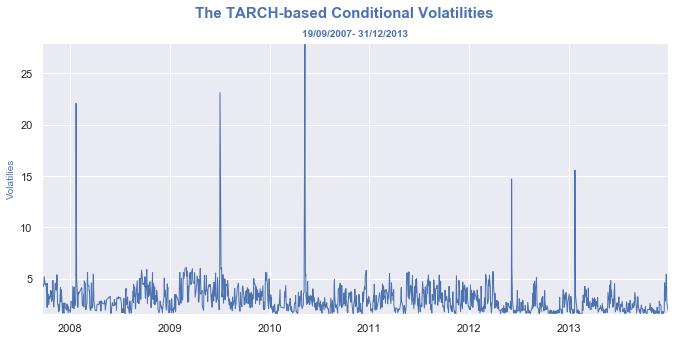

In [24]:
fig=plt.figure(figsize=(10,5))
plt.plot(results.conditional_volatility['2007':'2013'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The TARCH-based Conditional Volatilities', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2013',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Volatilies',fontsize=10,color='b')

## Residuals standardized by conditional volatility

Text(0, 0.5, 'Volatilies')

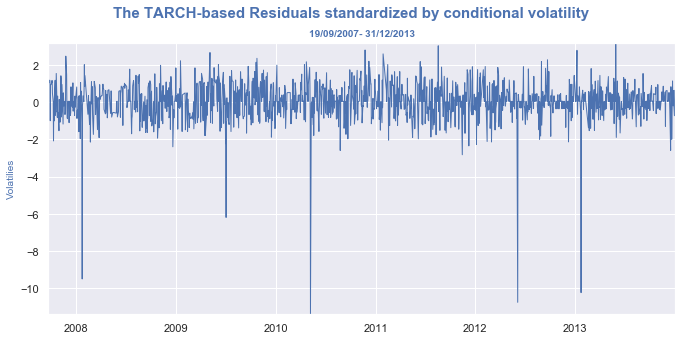

In [25]:
fig=plt.figure(figsize=(10,5))
plt.plot(results.std_resid['2007':'2013'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The TARCH-based Residuals standardized by conditional volatility', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('19/09/2007- 31/12/2013',fontsize=10,
          fontweight='bold',color='b')
plt.ylabel('Volatilies',fontsize=10,color='b')


# ARCH LM test for conditional heteroskedasticity

Arch Lagrange Multiplier or ARCH LM tests whether coefficients in the regression:


$$\epsilon^{2}_{t}=\alpha_{0} + \alpha_{1}\epsilon^{2}_{t-1}+ \alpha_{2}\epsilon^{2}_{t-2}+...++ \alpha_{p}\epsilon^{2}_{t-p}+e_{t} $$

where 

$$\epsilon_{t}=r_{t}-mean(r_{t}) $$

$H_{0}:$ $ \alpha_{0}=\alpha_{1}=...=\alpha_{p}$ or Residuals are homoskedastic/ No ARCH effect


In [17]:
print(results.arch_lm_test(lags=10))

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 0.9084
P-value: 0.9999
Distributed: chi2(10)


P-value is very big, we can not reject the null hypothesis